Scale =  10.472 +/- 0.601
Offset = 3.013 +/- 0.073
Sigma =  1.928 +/- 0.121


<IPython.core.display.Javascript object>


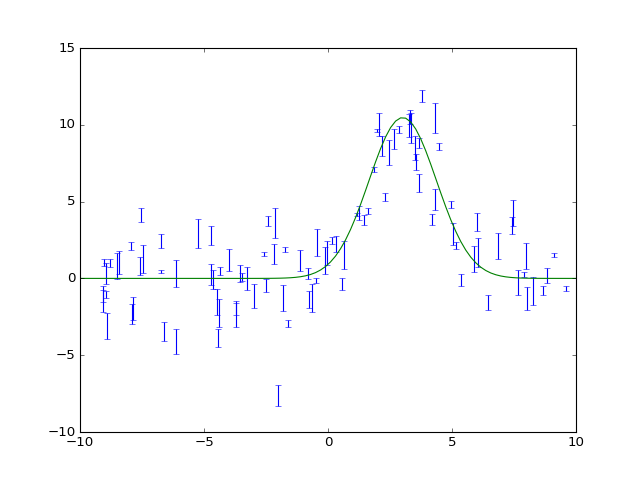

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:2748: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


In [1]:
%matplotlib notebook
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pylab as plt

# Create a function
# ==> First encounter with *whitespace* in Python <==
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

# Generate fake data.
# Note: functions in random package, array arithmetic (exp)
n = 100
x = np.random.uniform(-10., 10., n)
y = np.exp(-(x - 3.)**2 / 4) * 10. + np.random.normal(0., 2., n)
e = np.random.uniform(0.1, 1., n)
# Note: these error bars don't reflect the distribution from which
# they were drawn! Chi^2 of the fit will be poor.

# Fit
popt, pcov = curve_fit(gaussian, x, y, sigma=e)

# Print results
print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

# Plot data
plt.errorbar(x, y, yerr=e, linewidth=1, color='black', fmt=None)

# Plot model
xm = np.linspace(-10., 10., 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))

# Save figure
#savefig('fit.png')
plt.show()

<IPython.core.display.Javascript object>


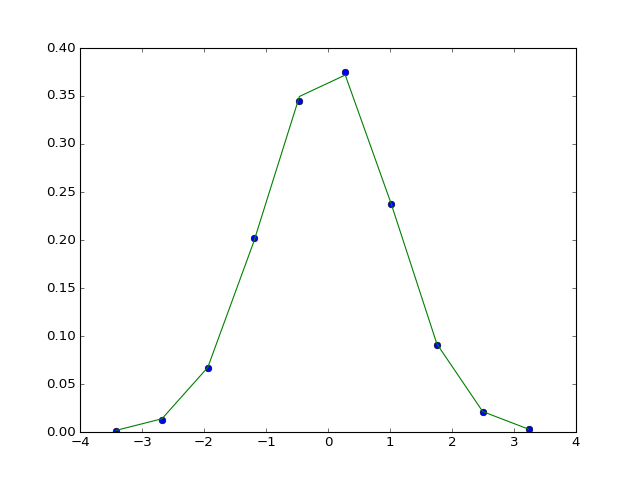

Fitted mean =  -0.00115164418791
Fitted standard deviation =  1.03708389935


In [2]:
%matplotlib notebook
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = numpy.random.normal(size=10000)

hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data', marker="o", ls="")
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]

plt.show()